## Problem Statement
- Applying K-means Clustering and Hierarchical/Agglomerative Clustering on Credit Card Dataset.

## About dataset
- Source: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?datasetId=14701&language=Python
- The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- Following is the Data Dictionary for Credit Card dataset :-
  - CUSTID : Identification of Credit Card holder (Categorical)
  - BALANCE : Balance amount left in their account to make purchases (
  - BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
  - PURCHASES : Amount of purchases made from account
  - ONEOFFPURCHASES : Maximum purchase amount done in one-go
  - INSTALLMENTSPURCHASES : Amount of purchase done in installment
  - CASHADVANCE : Cash in advance given by the user
  - PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
  - ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
  - PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
  - CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
  - CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
  - PURCHASESTRX : Numbe of purchase transactions made
  - CREDITLIMIT : Limit of Credit Card for user
  - PAYMENTS : Amount of Payment done by user
  - MINIMUM_PAYMENTS : Minimum amount of payments made by user
  - PRCFULLPAYMENT : Percent of full payment paid by user
  - TENURE : Tenure of credit card service for user

## Agenda
- Importing libraries & Loading data
- Basic data exploration and Data Preprocessing
- K-means Clustering
- Agglomerative CLustering
- Visualizing the Kmeans classes and Agglomerative classes
- Evaluation of the clustering models using silhouette_score
- Visualizing and Interpretation of clustered results

## Import required libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

## Load the dataset

In [2]:
## If using google colab

#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/CC GENERAL.csv')
#df.head()

In [21]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/credit_card_data.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Explore the data

In [22]:
## lets check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [23]:
## lets check missing values in the dataset
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- We have missing values in the columns MINIMUM_PAYMENTS and CREDIT_LIMIT
- Lets treat them accordingly

In [24]:
## Lets Impute missing values using mean imputation method
df = df.fillna(df['MINIMUM_PAYMENTS'].mean())
df = df.fillna(df['CREDIT_LIMIT'].mean())

In [25]:
## Lets recheck the missing values
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [26]:
## Check duplicated records in the dataset
len(df[df.duplicated()])

0

In [27]:
## dropping redundant columns which are not useful for model buidling
df.drop('CUST_ID',axis=1,inplace=True)

## Scale the data
- NOTE: Since this is unsupervised learning, we donot have the target variable and there is no concept of train test split in this

In [28]:
## Lets create a copy of the original dataframe and name the copy as df_scaled
df_scaled = df.copy()

In [29]:
## Standardize the data using standard scalar
ss = StandardScaler()

df_scaled.iloc[:,:] = ss.fit_transform(df_scaled.iloc[:,:])

In [30]:
df_scaled.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960268,-0.528979,-0.310968,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688712,0.818642,0.089310,0.234227,0.36068


Now we are going to build our machine learning clustering models. 

we will be using two methods; **k-means clustering** and **hierarchical clustering/Agglomerative clustering** algorithms.

**`For k-means clustering algorithm:`**
* First of all we will find the best k value.
* Than we will use this k value to create a k-means model.
* And we will visualize the k-means clustered classes.

**`For hierarchical clustering algorithm:`**
* First we will apply a dendrogram in order to find how many classes do we have in our data.
* Than we will use this class number to apply a hierarchical clustering algorithm.
* Lastly we will compare k-means and hierarchical clustered classes.

## K-means Clustering

In [31]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(df_scaled)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,152150.000000
1,2,127784.611234
2,3,111986.194143
3,4,99073.509321
4,5,91502.636291
5,6,84850.998131
6,7,80320.864957
7,8,74508.627683
8,9,70886.557509
9,10,66479.336730


## Interpretation.
- The total sum of squared distances of every data point from respective centroid is also called interia.
- Let us print the interia value for all k values.
- That K at which the interia stop to drop significantly (elbow method) will be the best K.

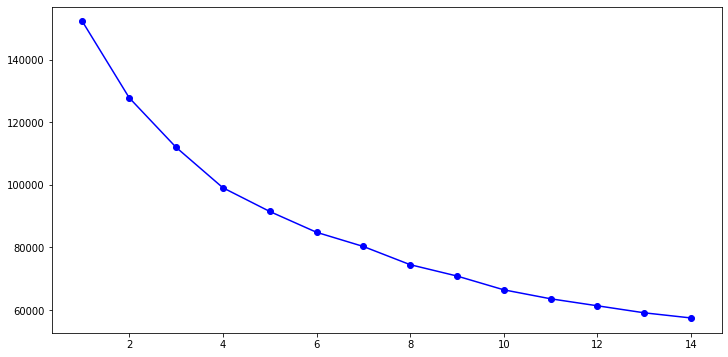

In [32]:
## Elbow plot
plt.figure(figsize=[12,6])
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

## Interpretation:
- From the Elbow plot we can see that at `K=3`the interia starts to drop significantly. The clusters are labeled as 0,1,2

In [33]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=3, n_init=15, random_state=2345)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [15]:
## obtained labels from kmeans clustering
kmeans.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [16]:
## Creating a new dataframe only for labels and converting it into categorical variables.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))

df_labels.head(5)

,Labels
0,0
1,1
2,0
3,0
4,0


In [17]:
df_labels['Labels'] = df_labels['Labels'].astype('category')

In [18]:
## joining the label dataframe with unscaled initial dataframe.(df)

df_kmeans = df.join(df_labels)

df_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
df_kmeans['Labels'].value_counts()

0    6119
1    1596
2    1235
Name: Labels, dtype: int64

## Visualizing K-means clustered classes:
- for Visualization we only using combination of two features and pass 'Lables' in the hue parameter

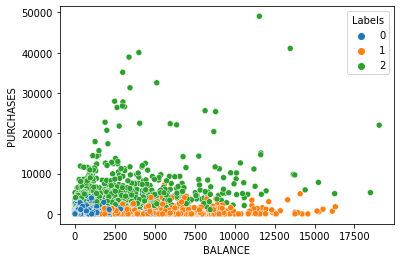

In [34]:
sns.scatterplot(df_kmeans['BALANCE'],df_kmeans['PURCHASES'],hue='Labels',data=df_kmeans)
plt.show()

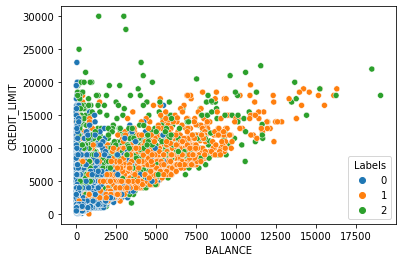

In [ ]:
sns.scatterplot(df_kmeans['BALANCE'],df_kmeans['CREDIT_LIMIT'],hue='Labels',data=df_kmeans)
plt.show()

### Compute Silhouette score for Kmeans clustering technique
- It is a metric used to calculate the goodness of a clustering technique used.
- 1: Means clusters are well apart from each other and clearly distinguished.
- 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
- -1: Means clusters are assigned in the wrong way.
- So, In order to chose the best optimal number of clusters we need to pick the K clusters which is having silhouette score close to 1

In [19]:
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(df_scaled)
    labels = kmeans.predict(df_scaled)
    print(i,silhouette_score(df_scaled,labels))

2 0.21009480958725976
3 0.2506012040473356
4 0.19760976475088443
5 0.18819777502925011
6 0.20344008891943585
7 0.20900535463060058
8 0.22162216190999567
9 0.22614539196185102
10 0.22036403825479794
11 0.21899078261356084
12 0.21451621186375971
13 0.2186856094374799
14 0.21983776493197396


#### From above, we can observe that for 3 clusters the silhoutte score is highest, we can choose optimal clusters as K=3
---------------

## Hierarchical Clustering

- **Creating the Dendogram**.
We use dendrogram to find how many classes we have in our data set.

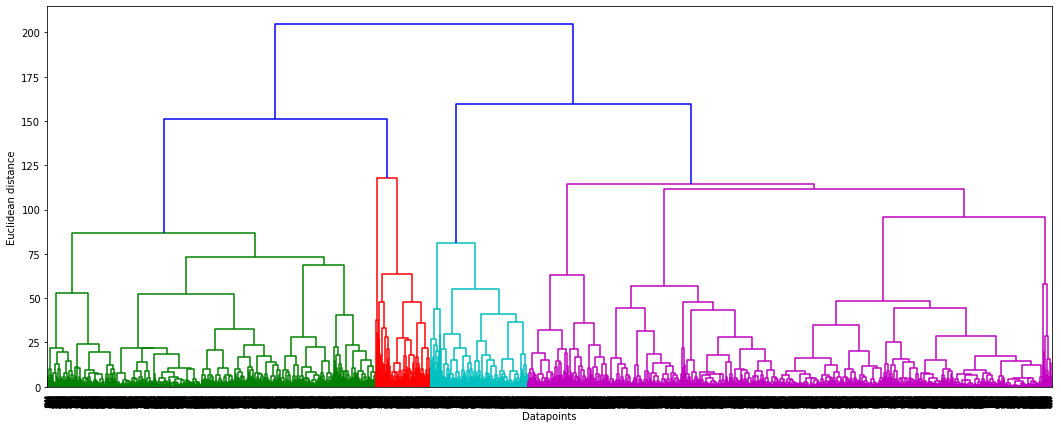

In [35]:
plt.figure(figsize=[18,7])
merg = linkage(df_scaled, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

### How do we determine the optimal number of clusters from above dendogram?
- We look for the largest distance that we can vertically observe without crossing any horizontal line. 
- We can observe that there are 4 classes from the dendogram

In [36]:
hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean',
                                     linkage='ward')

hie_cluster_model = hie_cluster.fit(df_scaled)

In [ ]:
## Creating a dataframe of the labels

df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(2)

,Labels
0,1
1,2


In [ ]:
## joining the label dataframe with unscaled initial dataframe.(df)

df_hier = df.join(df_label1)
df_hier.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


### Comparing the K-Means and Hierarchical Clustered labels.
- for Visualization we only using combination of two features and pass 'Lables' in the hue parameter

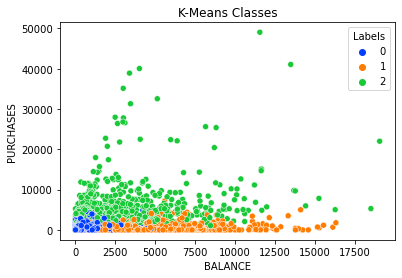

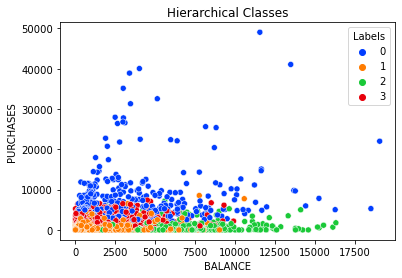

In [ ]:
plt.title('K-Means Classes')
sns.scatterplot(x='BALANCE',y='PURCHASES',hue='Labels',data=df_kmeans,palette='bright')
plt.show()

plt.title('Hierarchical Classes')
sns.scatterplot(x='BALANCE',y='PURCHASES',hue='Labels',data=df_hier,palette='bright')
plt.show()

### Compute Silhouette score for Hierarchical/Agglomerative clustering technique

In [ ]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(df_scaled)
    labels = hier.fit_predict(df_scaled)
    print(i,silhouette_score(df_scaled,labels))

2 0.17754577159509877
3 0.17311144900314726
4 0.15471067468996275
5 0.1580699781352141
6 0.17335658236705617
7 0.1564164685630304
8 0.15203529144062616
9 0.15371938846869165
10 0.15633668985713717
11 0.1589099526753353
12 0.15622694354432262
13 0.15875054849618908
14 0.16612293896894317


#### From above, we can observe that the silhouette score is high for 2  and 3 clusters 
------------

## Conclusion

- We built Kmeans clustering and Agglomerative clustering models
- *KMeans* - for chosing the optimal k value we used elbow method (we chose K=3)
- *Agglomerative* - for chosing the optimal k value we used dendogram (we chose k=4)
- To conculde which clustering technique is performing the best, we evaluated through silhouette score
- For Kmeans the highest silhouette score value is 0.25 for 3 clusters
- For Agglomerative the highest silhouette score value is 0.177 for 2 clusters
- So, we can choose the KMeans clustering model as our best and final model and optimal number of clusters as 3
- And, also after assigning the clustered lables from kmeans, we can build a classification model upon that and evaluate the model performance 

## Visualization and Interpretation of results

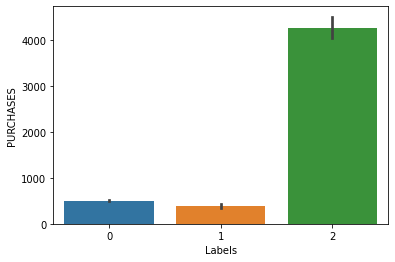

In [37]:
sns.barplot(df_kmeans['Labels'],df_kmeans['PURCHASES'])
plt.show()

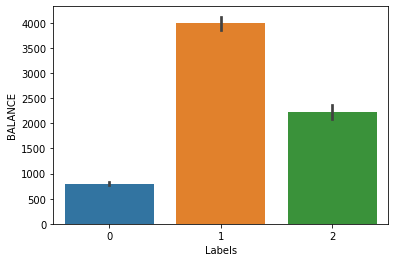

In [38]:
sns.barplot(df_kmeans['Labels'],df_kmeans['BALANCE'])
plt.show()

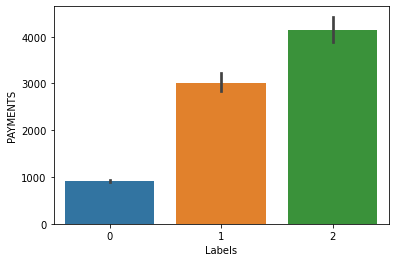

In [ ]:
sns.barplot(df_kmeans['Labels'],df_kmeans['PAYMENTS'])
plt.show()

## Observation
- Cluster 0 does less purchases, have lesser balance and payments are also less compare to clusters 1 and 2
- Cluster 1 do less purchases but have maximum balance compare to other two clusters and payments are in average
- Cluster 2 does maximum purchases and do maximum payments and has average balance

-----
## Happy Learning
-----